In [1]:
# uses yahoo finance api to download stock
import yfinance as yf

In [2]:
# gspc
sp500 = yf.Ticker('^GSPC')

In [3]:
sp500 = sp500.history(period= 'max')

In [4]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-19 00:00:00-05:00,4796.279785,4842.069824,4785.870117,4839.810059,4287200000,0.0,0.0
2024-01-22 00:00:00-05:00,4853.419922,4868.410156,4844.049805,4850.430176,4297610000,0.0,0.0
2024-01-23 00:00:00-05:00,4856.799805,4866.479980,4844.370117,4864.600098,3912800000,0.0,0.0


In [5]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-01-11 00:00:00-05:00', '2024-01-12 00:00:00-05:00',
               '2024-01-16 00:00:00-05:00', '2024-01-17 00:00:00-05:00',
               '2024-01-18 00:00:00-05:00', '2024-01-19 00:00:00-05:00',
               '2024-01-22 00:00:00-05:00', '2024-01-23 00:00:00-05:00',
               '2024-01-24 00:00:00-05:00', '2024-01-25 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24132, freq=None)

# Cleaning and Visualizing

<AxesSubplot:xlabel='Date'>

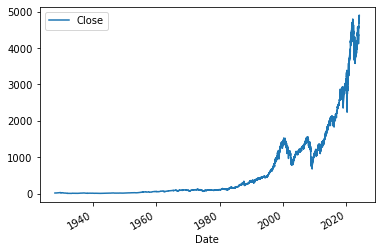

In [6]:
sp500.plot.line(y='Close', use_index= True)

In [7]:
# dropping columns
del sp500['Dividends']
del sp500['Stock Splits']

In [8]:
# set up target, what we will be predicting
sp500['Tomorrow'] = sp500['Close'].shift(-1)

In [9]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-01-19 00:00:00-05:00,4796.279785,4842.069824,4785.870117,4839.810059,4287200000,4850.430176
2024-01-22 00:00:00-05:00,4853.419922,4868.410156,4844.049805,4850.430176,4297610000,4864.600098
2024-01-23 00:00:00-05:00,4856.799805,4866.479980,4844.370117,4864.600098,3912800000,4868.549805


In [10]:
# this is what we are trying to predict
sp500['Target'] = (sp500['Tomorrow'] > sp500['Close']).astype(int)

In [11]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-01-19 00:00:00-05:00,4796.279785,4842.069824,4785.870117,4839.810059,4287200000,4850.430176,1
2024-01-22 00:00:00-05:00,4853.419922,4868.410156,4844.049805,4850.430176,4297610000,4864.600098,1
2024-01-23 00:00:00-05:00,4856.799805,4866.479980,4844.370117,4864.600098,3912800000,4868.549805,1


##### Historical data can be bad for  stocks cause market could have shifted

In [12]:
#removing data before 1990 Jan 1
sp500 =sp500.loc['1990-01-01':].copy()

In [13]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-01-19 00:00:00-05:00,4796.279785,4842.069824,4785.870117,4839.810059,4287200000,4850.430176,1
2024-01-22 00:00:00-05:00,4853.419922,4868.410156,4844.049805,4850.430176,4297610000,4864.600098,1
2024-01-23 00:00:00-05:00,4856.799805,4866.479980,4844.370117,4864.600098,3912800000,4868.549805,1


# modelling

#### Random forest training - easily picks up non linear relationships

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state= 1)

#split data - since its time series data, we cant use cross validation

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ['Close', 'Volume', 'Open', 'High', 'Low']
model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [16]:
from sklearn.metrics import precision_score

In [17]:
preds = model.predict(test[predictors])
preds

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
import pandas as pd

preds = pd.Series(preds, index=test.index)
preds

Date
2023-09-01 00:00:00-04:00    0
2023-09-05 00:00:00-04:00    1
2023-09-06 00:00:00-04:00    1
2023-09-07 00:00:00-04:00    1
2023-09-08 00:00:00-04:00    0
                            ..
2024-01-19 00:00:00-05:00    0
2024-01-22 00:00:00-05:00    0
2024-01-23 00:00:00-05:00    0
2024-01-24 00:00:00-05:00    0
2024-01-25 00:00:00-05:00    0
Length: 100, dtype: int32

In [19]:
# calculate precision score
precision_score(test['Target'], preds)

0.54

#### combine  

In [20]:
combined = pd.concat([test['Target'], preds], axis= 1)

<AxesSubplot:xlabel='Date'>

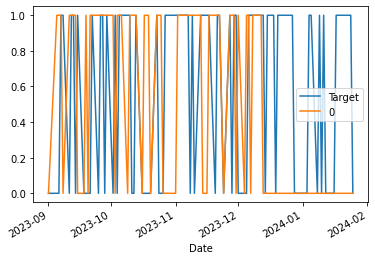

In [21]:
combined.plot()

We mostly predicted the opposite, market will go up and it went down.

# Backtesting - across multiple years

In [22]:
# create pred function

def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name='Predictions')
    combined = pd.concat([test['Target'], preds], axis= 1)
    return combined

In [23]:
# create backtest function
# take the first 10 yrs to train model, 1 year has 250 steps
# take first 10 yrs of data and predict values for 11th yr, take first 11yrs predict 12th year values

def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [24]:
predictions = backtest(sp500, model, predictors)

In [25]:
predictions['Predictions'].value_counts()

Predictions
0    3486
1    2596
Name: count, dtype: int64

We predicted market will go down on about 3400 days, and up on 2500 days. 

In [26]:
#checking precision score
precision_score(predictions['Target'], predictions['Predictions'])

0.5288906009244992

We were about 53% accurate.

looking at % of days where market actually went up

In [27]:
predictions['Target'].value_counts() / predictions.shape[0]

Target
1    0.534693
0    0.465307
Name: count, dtype: float64

SMP prices actually went up 53.4% of days. If we woke up and decided to buy and sell at end of day, we would do better than our model.

##### Roll mean 

##### Adding additional predictors 

In [28]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500['Close'] / rolling_averages['Close']
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()['Target']
    
    new_predictors += [ratio_column, trend_column]

In [29]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-19 00:00:00-05:00,4796.279785,4842.069824,4785.870117,4839.810059,4287200000,4850.430176,1,1.006119,2.0,1.012099,3.0,1.058888,39.0,1.118437,136.0,1.212935,528.0
2024-01-22 00:00:00-05:00,4853.419922,4868.410156,4844.049805,4850.430176,4297610000,4864.600098,1,1.001096,2.0,1.011502,3.0,1.058885,39.0,1.120031,136.0,1.215119,528.0
2024-01-23 00:00:00-05:00,4856.799805,4866.479980,4844.370117,4864.600098,3912800000,4868.549805,1,1.001459,2.0,1.010302,4.0,1.059365,40.0,1.122424,137.0,1.218169,529.0


In [30]:
# drop NANS / nulls
sp500 = sp500.dropna()

In [31]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-18 00:00:00-05:00,4760.100098,4785.790039,4740.569824,4780.939941,4019000000,4839.810059,1,1.004383,1.0,1.002285,2.0,1.048389,38.0,1.105719,136.0,1.198652,527.0
2024-01-19 00:00:00-05:00,4796.279785,4842.069824,4785.870117,4839.810059,4287200000,4850.430176,1,1.006119,2.0,1.012099,3.0,1.058888,39.0,1.118437,136.0,1.212935,528.0
2024-01-22 00:00:00-05:00,4853.419922,4868.410156,4844.049805,4850.430176,4297610000,4864.600098,1,1.001096,2.0,1.011502,3.0,1.058885,39.0,1.120031,136.0,1.215119,528.0


You can see now our data starts in 1993.

#### Improving our model

In [32]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [36]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6 ] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name='Predictions')
    combined = pd.concat([test['Target'], preds], axis= 1)
    return combined

In [37]:
predictions = backtest(sp500, model, new_predictors)

In [38]:
predictions['Predictions'].value_counts()

Predictions
0.0    4249
1.0     832
Name: count, dtype: int64

Now, We predicted market will go down on about 4200 days, and up on about 800 days.

In [39]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5733173076923077

Our model is now 57% accurate which is actually really good.